Create our class labels and import the necessary modules

In [1]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
# load the data properly into train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
print(f"X train shape  {X_train.shape}\ny train shape is  {y_train.shape}\nX test shape is  {X_test.shape}\ny test shape is  {y_test.shape}")

X train shape  (50000, 32, 32, 3)
y train shape is  (50000, 1)
X test shape is  (10000, 32, 32, 3)
y test shape is  (10000, 1)


In [5]:
# check how the data looks
X_train[6][0]

array([[164, 206,  84],
       [105, 140,  61],
       [118, 148, 101],
       [129, 158, 115],
       [134, 159, 119],
       [146, 170, 124],
       [166, 185, 150],
       [183, 195, 178],
       [199, 210, 193],
       [174, 190, 163],
       [140, 169, 116],
       [154, 196, 104],
       [173, 223,  93],
       [178, 230,  83],
       [169, 219,  67],
       [177, 227,  73],
       [180, 228,  89],
       [178, 225,  85],
       [175, 222,  72],
       [192, 236, 100],
       [199, 243, 110],
       [203, 243,  97],
       [188, 229,  90],
       [169, 206,  94],
       [161, 194, 109],
       [151, 187, 121],
       [150, 187, 120],
       [133, 169,  95],
       [123, 159,  88],
       [109, 147,  73],
       [108, 147,  69],
       [ 91, 129,  57]], dtype=uint8)

The values above range from 0 to 255





In [6]:
# check the target labels
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Let's examine the value at index 1

In [7]:
y_train[1]

array([9], dtype=uint8)

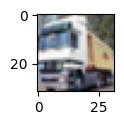

In [8]:
# plot image of index 1
plt.figure(figsize= (1, 1))
plt.imshow(X_train[1])

In [9]:
classes[y_train[1][0]]

'truck'

Let's create a function that will plot the sample

In [10]:
def plot_sample(test_or_train, index):
  if test_or_train.lower() == 'train':
    print(classes[y_train[index][0]])
    plt.figure(figsize= (1, 1))
    plt.imshow(X_train[index])
  elif test_or_train.lower() == 'test':
    print(classes[y_test[index][0]])
    plt.figure(figsize= (1, 1))
    plt.imshow(X_test[index])

bird


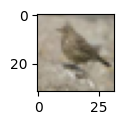

In [11]:
plot_sample('train', 120)

# Data Scaling

Because the RGB values in our data ranges from 0 to 255, we will divide all of them by 255 to scale them between 0 & 1.

In [12]:
X_train[0][0][23]

array([139, 108,  77], dtype=uint8)

In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [14]:
X_train_scaled[0][0][23]

array([0.54509804, 0.42352941, 0.30196078])

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(687, activation = 'relu'),
    keras.layers.Dense(567, activation = 'relu'),
    keras.layers.Dense(230, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
ann_model.compile(optimizer  ='SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

ann_model.fit(X_train_scaled, y_train, epochs = 50, callbacks = [early_stopping])

Epoch 1/50
1563/1563 [==============================] - 55s 34ms/step - loss: 1.8499 - accuracy: 0.3372
Epoch 2/50
1563/1563 [==============================] - 37s 24ms/step - loss: 1.6549 - accuracy: 0.4104
Epoch 3/50
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5692 - accuracy: 0.4410
Epoch 4/50
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5064 - accuracy: 0.4650
Epoch 5/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4583 - accuracy: 0.4847
Epoch 6/50
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4154 - accuracy: 0.4953
Epoch 7/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.3815 - accuracy: 0.5095
Epoch 8/50
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3464 - accuracy: 0.5235
Epoch 9/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3142 - accuracy: 0.5344
Epoch 10/50
1563/1563 [==============================] - 31s 20m

In [17]:
# predict X test
ann_predictions = ann_model.predict(X_test_scaled)

313/313 [==============================] - 2s 7ms/step


In [18]:
ann_predictions = [np.argmax(i) for i in ann_predictions]

Let's build a Convoluted Neural Network

In [19]:
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size=(3, 3), input_shape= (32, 32, 3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),



    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

cnn_model.compile(optimizer  ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

cnn_model.fit(X_train_scaled, y_train, epochs = 100, callbacks = [early_stopping])

Epoch 1/100
1563/1563 [==============================] - 59s 37ms/step - loss: 1.6733 - accuracy: 0.3802
Epoch 2/100
1563/1563 [==============================] - 58s 37ms/step - loss: 1.3490 - accuracy: 0.5127
Epoch 3/100
1563/1563 [==============================] - 57s 36ms/step - loss: 1.2077 - accuracy: 0.5675
Epoch 4/100
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1235 - accuracy: 0.6006
Epoch 5/100
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0579 - accuracy: 0.6276
Epoch 6/100
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0037 - accuracy: 0.6449
Epoch 7/100
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9610 - accuracy: 0.6598
Epoch 8/100
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9227 - accuracy: 0.6744
Epoch 9/100
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8883 - accuracy: 0.6861
Epoch 10/100
1563/1563 [==============================]

In [23]:
cnn_predictions = cnn_model.predict(X_test_scaled)
cnn_predictions = [np.argmax(i) for i in cnn_predictions]

313/313 [==============================] - 8s 23ms/step


# Evaluation

ANN model

In [25]:
# train set evaluation
ann_model.evaluate(X_train_scaled, y_train)

1563/1563 [==============================] - 15s 10ms/step - loss: 0.3772 - accuracy: 0.8645


[0.3772372007369995, 0.8644999861717224]

In [24]:
# Test set evaluation
ann_model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.8847 - accuracy: 0.5377


[1.8846977949142456, 0.5376999974250793]

The ANN model is overfitting because it is performing far better on the training set than on the test set.

In [26]:
# classification matrix
print(classification_report(y_test, ann_predictions))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59      1000
           1       0.72      0.63      0.67      1000
           2       0.39      0.42      0.41      1000
           3       0.44      0.20      0.27      1000
           4       0.45      0.49      0.47      1000
           5       0.36      0.66      0.46      1000
           6       0.59      0.64      0.61      1000
           7       0.59      0.63      0.61      1000
           8       0.67      0.67      0.67      1000
           9       0.66      0.54      0.59      1000

    accuracy                           0.54     10000
   macro avg       0.56      0.54      0.54     10000
weighted avg       0.56      0.54      0.54     10000



CNN model

In [27]:
# train set evaluation
cnn_model.evaluate(X_train_scaled, y_train)

1563/1563 [==============================] - 28s 18ms/step - loss: 0.1316 - accuracy: 0.9606


[0.13157308101654053, 0.960640013217926]

In [28]:
# test set evaluation
cnn_model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.3911 - accuracy: 0.6935


[1.391061544418335, 0.6934999823570251]

In [29]:
# Check classification report for test set
print(classification_report(y_test, cnn_predictions))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.84      0.80      0.82      1000
           2       0.62      0.54      0.58      1000
           3       0.49      0.48      0.48      1000
           4       0.62      0.67      0.65      1000
           5       0.56      0.64      0.60      1000
           6       0.79      0.70      0.75      1000
           7       0.76      0.76      0.76      1000
           8       0.77      0.81      0.79      1000
           9       0.80      0.77      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



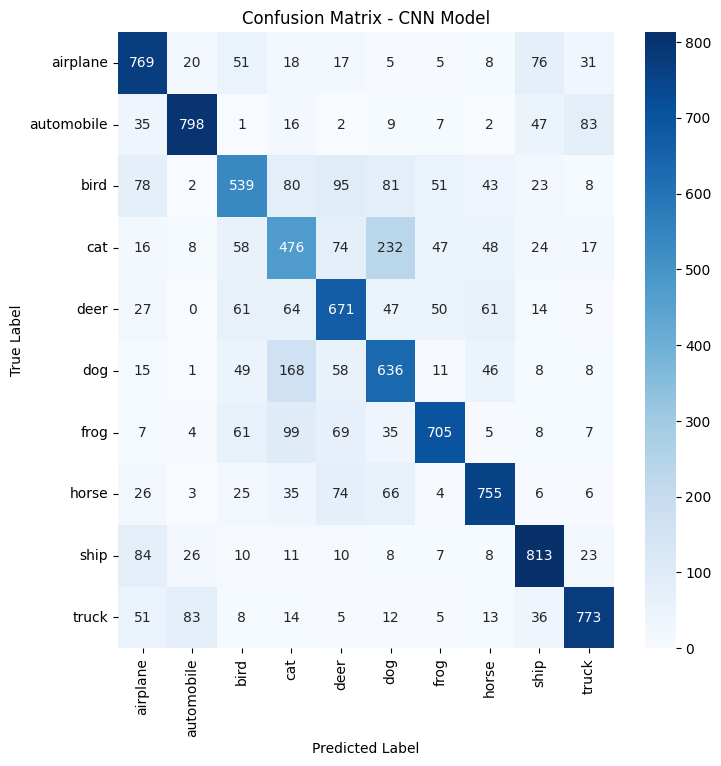

In [85]:
# Let's see the confusion matrix for our cnn predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(y_test, cnn_predictions)

# Set up the plot
plt.figure(figsize=(8, 8))

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

# Set the title and labels
plt.title("Confusion Matrix - CNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()


In [56]:
classes[ann_predictions[6]]

'automobile'

In [55]:
classes[cnn_predictions[6]]

'automobile'

automobile


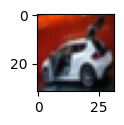

In [57]:
plot_sample('test', 6)

Let's create a funtion that tells us what the models predicted and what the actual image was.

In [72]:
def check_prediction_accuracy(index):
  print(f'ANN model predicted  {classes[ann_predictions[index]]}.')
  print(f'CNN model predicted  {classes[cnn_predictions[index]]}.')
  print('The actual picture is: ')
  plot_sample('test', index)

ANN model predicted  horse.
CNN model predicted  dog.
The actual picture is: 
dog


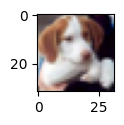

In [73]:
check_prediction_accuracy(16)

For the 16th index in the test set, the ANN model got it wrong.

ANN model predicted  dog.
CNN model predicted  cat.
The actual picture is: 
cat


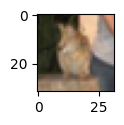

In [74]:
check_prediction_accuracy(46)

In [89]:
print('That\'s all for this project!! Thank you for joining me on this journey.\nBy Bokang Gopane.')

That's all for this project!! Thank you for joining me on this journey.
By Bokang Gopane.


<!-- Dataset Citation -->
The CIFAR-10 dataset was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton as described in their technical report:

Krizhevsky, A., Nair, V., & Hinton, G. (2009). Learning Multiple Layers of Features from Tiny Images. Technical Report, Department of Computer Science, University of Toronto. Retrieved from http://www.cs.toronto.edu/~kriz/cifar.html
